In [1]:
import numpy as np
import matplotlib.pyplot as plt

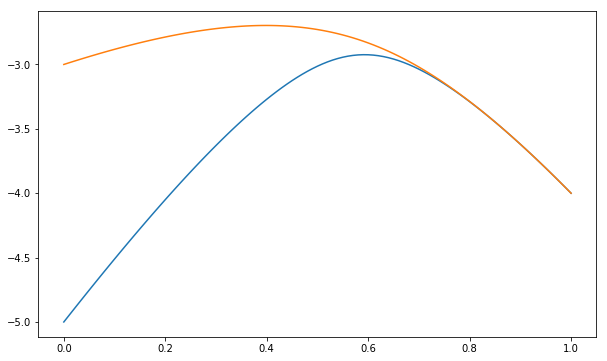

In [2]:
sigmax = np.array([[0, 1], [1, 0.]])
sigmaz = np.array([[1, 0], [0, -1]])

n = 5

H1 = np.zeros((2**5, 2**5))
for k in range(n):
    h = np.array([[1.0]])
    for i in range(n):
        if i==k:
            h = np.kron(h, sigmax)
        else:
            h = np.kron(h, np.eye(2))
    H1 = H1 + h

H2 = np.zeros((2**5, 2**5))
for k in range(n-1):
    h1 = np.array([[1.0]])
    h2 = np.eye(2)
    for i in range(n):
        if i==k:
            h1 = np.kron(h1, sigmaz)
        elif i==k+1:
            h2 = np.kron(h2, sigmaz)
        else:
            h1 = np.kron(h1, np.eye(2))
            h2 = np.kron(h2, np.eye(2))
    h1 = np.kron(h1, np.eye(2))
    H2 = H2 + np.dot(h1, h2)


H = lambda tau: (1-tau) * H1 + tau * H2

b1 = []
b2 = []
Tau = []
for i in range(0, 101):
    tau = i/100.
    Tau.append(tau)
    
    e = np.linalg.eigvals(H(tau))
    e.sort()
    b1.append(e[0])
    b2.append(e[1])

plt.figure(figsize=(10, 6))
plt.plot(Tau, b1)
plt.plot(Tau, b2)
plt.show()